## ■ 15장. 모델 성능 평가

이 데이터에는 앞에서 배운 여러 머신러닝 모델중에  
어떤 머신러닝 모델이 적합하다라는 결론을 낼 수 있는 부분!

## ■ 모델 성능평가가 중요한 이유가 무엇인가?

머신러닝(학생)이 수행한 결과 (분류, 예측)에 대한 공정한 평가를 통해   
머신러닝(학생)이 앞으로도 미래의 데이터에 대해서 잘 분류하고 예측 할 수 있도록 해주고  
분류결과가 요행수로 맞힌게 아니라는 것을 확신하게 해주며 분류결과를 좀 더 일반화 할 수 있기 대문입니다.

## ■ 정확도가 무엇인가?

학습자가 맞거나 틀린 경우의 비율을 말한다.


## ■ 모델 성능 평가를 위해 정확도로 만으로는 충분하지 않은 이유?

암 판정하는 분류기가 90%의 정확도를 갖고 있다고 하면 1%의 오류율이 있기 때문에 어떤 데이터 대해서는 오류를 범할 수도 있게 된다.  
그래서 정확도 만으로는 성능을 측정하는데 충분하지가 않다.  
정확도와 더불어 분류기의 유용성에 대한 다른 성능 척도를 정의하는것이 중요하다.

__" 정확도 + 다른 성능 척도 "__ 

## ■ 그러면 다른 성능 척도에는 무엇이 있는가 ? (면접이나 발표때도 참고할것!)

1. 카파통계량
2. 민감도와 특이도
3. 정밀도와 재현율
4. Roc 곡선

__예 :__ 갑상선 암판정을 받고 의사 선생님이 하는 말이 갑상선이 2개가 있는데 한쪽에 암 종양이 있다. 한쪽만 떼어낼래요? 아니면 2개 다 때어낼레요?

기존의 갑상선 질환의 환자들의 경우 한쪽만 떼어냈을 때 다른 한쪽이 암이 될 확률이 25%가 있었습니다.

## ■ 카파 통계량

__" 두 관찰자간의 측정 범주값에 대한 일치도를 측정하는 방법 "__

K = Pr(a) - Pr(e) / 1 - Pre(e)

__Pr(a) :__ 데이터에서 관찰된 2명의 평가자들의 일치확률
__Pr(e) :__ 2명의 평가자들이 데이터로부터 계산된 확률적 일치 확률(우연히 일치할 확률)

k(카파통계량) 이 0이면 완전 불일치이고, 1이면 완전 일치이다.

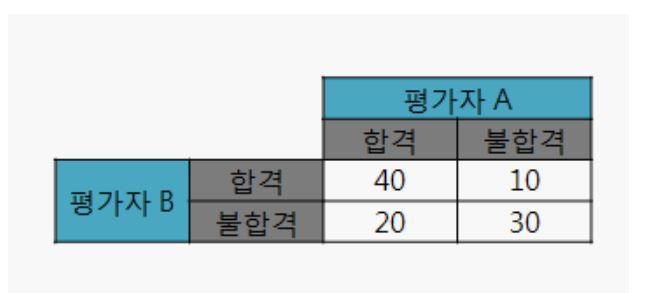
http://cafe.daum.net/oracleoracle/ScIC/232


### ※ 그림설명

평가자 A와 B 모두 40명에게 합격을 줬고, 30명에게는 불합격을 주었다.  
Pr(a)는 2명의 평가자들이 일치할 확률이 0.7이 된다.  

Pr(a) = 40 + 30 / 100 = 0.7 

#### Pr(a) : 데이터에서 관찰된 2명의 평가자들의 일치확률
#### Pr(e) : 2명의 평가자들이 데이터로부터 계산된 확률적 일치 확률 (우연히 일치할 확률)

Pr(e)를 계산하기 위해서는 평가자 A와 평가자 B의 각각의 합격과 불합격을 줄 확률을 구해야 합니다.  

__1. 평가자 A : 합격을 60번, 불합격 40번__

평가자 A는 합격을 60/100 = 60%의 확률  
평가자 A는 불합격을 40/100 = 40%의 확률  

__2. 평가자 B : 합격을 50번, 불합격 50번__

평가자 B는 합격을 50/100 = 50%의 확률  
평가자 B는 불합격을 50/100 = 40%의 확률  

__평가자 A와 평가자 B 둘 모두 확률적으로 "합격" 을 줄 확률은 ?__

0.6 x 0.5 = 0.3이다.

__평가자 A와 평가자 B 둘 모두 확률적으로 "불합격" 을 줄 확률은 ?__
0.4 x 0.5  = 0.2이다.

Pr(e) 는 데이터로부터 계산된 확률적으로 일치할 확률이므로 이 둘을 더해서 __0.3 + 0.2 = 0.5__이다.

그래서 카파 통계량을 구하면 ?

K = Pr(a) - Pr(e) / 1 - Pr(e) = 0.7 - 0.5 / 1 - 0.5 = 0.2 / 0.5 = 0.4 (보통일치)

### ※ 카파통계량 기준지수

- 거의 일치하지 않음 : 0.2보다 작음
- 어느 정도 일치 : 0.2 ~ 0.4
- 보통 일치 : 0.4 ~ 0.6
- 좋은 일치 : 0.6 ~ 0.8
- 매우 좋은 일치 : 0.8 ~ 1.0

## 문제242. 파이썬으로 카파 통계량을 구하시오!

In [1]:
from sklearn.metrics import cohen_kappa_score

y_true = [1,0,1,1,0,1] # 실제값(라벨)
y_hat = [0,0,1,1,0,1] # 예측값
result = cohen_kappa_score(y_true, y_hat)
print(result) # 좋은 일치

0.6666666666666667


## 문제243. 어제 했던 seabron 타이타닉 데이터를 가져와서 카파지수까지 도출해보시오!

In [11]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 정확도 도출하기(accuracy)
accuracy = accuracy_score( y_test, y_hat)
print(accuracy)

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

# 카파지수 도출하기
from sklearn.metrics import cohen_kappa_score

result = cohen_kappa_score(y_test, y_hat)
print(result) # 좋은 일치

train data 개수:  (499, 9)
test data 개수:  (215, 9)


[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


[[120   5]
 [ 35  55]]


0.813953488372093
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215

0.5990675990675991


C:\Users\wdp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## ■ 민감도와 특이도

유용한 분류기를 찾으려면, 보통 지나치게 보수적인 예측과 지나치게 공격적은 예측 사이에서의 균형이 필요하다.  
보수적인 예측과 공격적인 예측에 대한 것을 정하는 기준이 되는 정보가 민감도와 특이도이다.

#### 234 게시글 ■ 10장. 모델 성능 평가 그림 PPT

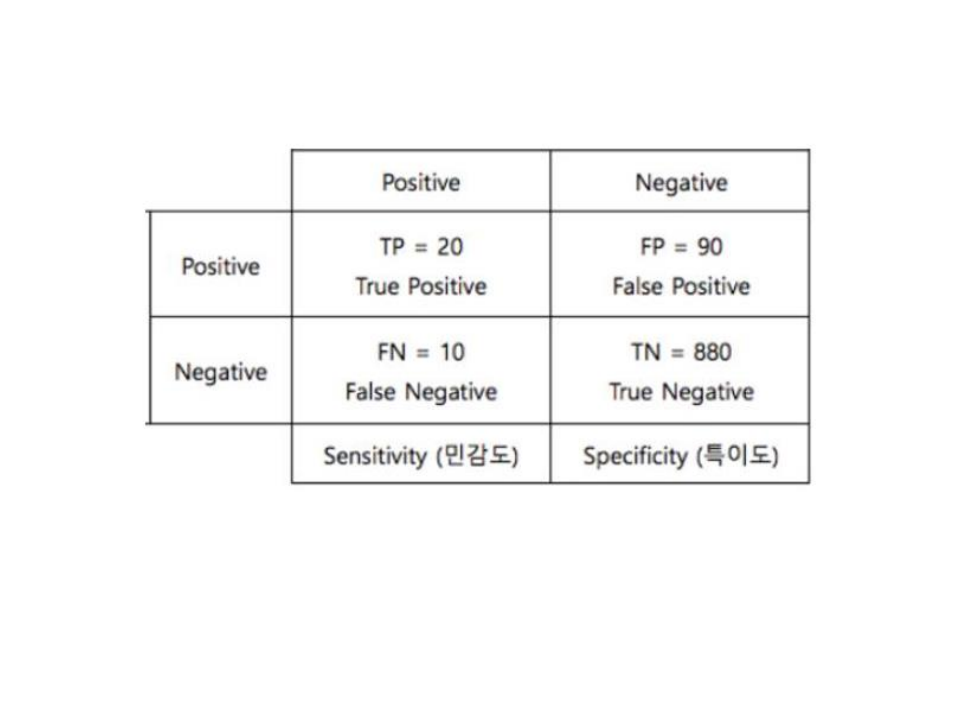

### 1. 민감도 : 실제 참인것중에서 참이라고 예측한 비율, 실제 구매한 사람중에서 구매할 것이라고 예측한 사람의 비율

__공식 :__ TP / (TP+FN) = 20 / (20+10) = 0.66

### 2. 특이도 : 실제 거짓인것중에서 거짓으로 예측한 비율, 실제 구매안한 사람중에서 구매안할것으로 예측한 사람의 비율

__공식 :__ TN / (FP+TN) = 880 / (90+880) = 0.907

민감도와 특이도는 0 ~ 1까지의 범위에 있으며, 값이 1에 가까울수록 바람직하다.  
그러나 실제로는 한쪽이 높으면 한쪽이 낮아져서 둘다 높게 맞출수가 없다.  
그래서 여러 모델중에서 하나를 선택하여야 한다.


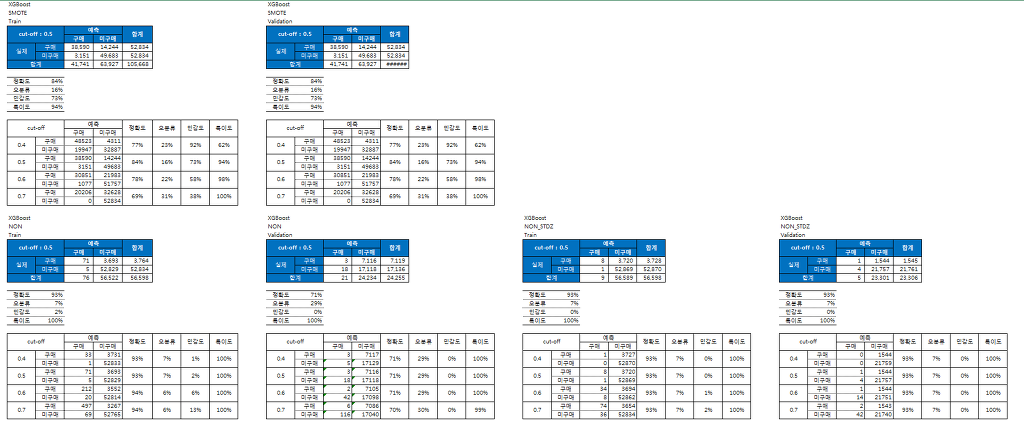
http://cafe.daum.net/oracleoracle/ScIC/236

민감도를 최고로 높게 맞춰놓고 그중에서 특이도가 높은 것을 선택한다.  
민감도가 높으면 특이도가 낮더라도 가치는 충분하다.

## 문제244. 파이썬으로 민감도와 특이도를 계산하시오~

In [3]:
from sklearn.metrics import confusion_matrix

y_true = [1,1,0,0]
y_pred = [1,0,1,0]

tn,fp,fn,tp = confusion_matrix(y_true, y_pred).ravel()
print(tn,fp,fn,tp)

# 민감도 ? TP / (TP+FN) = 0.5
# 특이도 ? TN / (FP+TN) = 0.5

1 1 1 1


### 문제245. 어제 했던 시본 타이타닉 데이터에 대한 서포터 벡터 머신의 모델의 민감도와 특이도를 출력하시오!

In [20]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

from sklearn import svm

model=svm.SVC(kernel='rbf',C=1 ,gamma=0.1)
model.fit(X_train,y_train)
y_hat=model.predict(X_test)

# =============================================================================
# # oob 평가
# 
# print(tree_model.oob_score_)
# print('\n')
# 
# =============================================================================




# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)

tn,fp,fn,tp = metrics.confusion_matrix(y_test, y_hat).ravel()

print(tn,fp,fn,tp)
print('\n')

sensitivity = tp / (tp+fn)
specificity = tn / (fp+tn)

print(sensitivity)
print(specificity)

# 모형 성능 평가 - 평가지표 계산 (정밀도, 재현도, f1-score 계산)
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

from sklearn.metrics import cohen_kappa_score

result = cohen_kappa_score(y_test, y_hat)
print(result) # 좋은 일치

train data 개수:  (499, 9)
test data 개수:  (215, 9)


[[104  21]
 [ 27  63]]
104 21 27 63


0.7
0.832
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       125
           1       0.75      0.70      0.72        90

    accuracy                           0.78       215
   macro avg       0.77      0.77      0.77       215
weighted avg       0.78      0.78      0.78       215

0.5370121130551817


## ■ 정밀도와 재현율

### ※ 정밀도(precision)

#### 공식 : TP / (TP + FP) = 20 / (20+90) = 0.18

참인것을 예측한 것중에서 실제 참인것의 비율  
구매할 것을 예측한 사람중에서 실제 구매한 사람의 비율   

### ※ 재현율(recall)

#### 공식 : TP / (TP + FN) = 20 / (20+10) = 0.66 (민감도와 같다)

실제 참인것들 중에서 참이라고 예측한 비율

1. 소극적 예측
    - 암이라고 판단하는것 자체를 소극적으로 봐서 확실한 경우가 아니면 암으로 판단을 안하는 것이다.  
    (정밀도 ↑, 재현율 ↓)

병원의 경우에는 안좋은 모델이다. 왜냐하면 암인 사람을 암이라고 판단을 잘 안한다.

2. 공격적 예측
    - 조금만 의심이가도 다 암이라고 판단한다.  
    (정밀도 ↓, 재현율 ↑)
    
이 모델은 암인 사람은 암이라고 하고 혹시 암이 아닌 사람을 암이라고 예측을 하는것이어서,  
실제로 검사결과가 정상이었다면 오히려 다행인것이어서   
그냥 다시 재검사 받으면 되므로 병원의 경우 소극적예측보다 적합하다고 할 수 있다.

## 문제246. 정밀도와 재현율을 파이썬 코드로 확인하시오!

In [19]:
from sklearn.metrics import confusion_matrix

y_true = [1,1,0,0]
y_pred = [1,0,1,0]

result = metrics.classification_report(y_true, y_pred)
print(result)

# 0에대한 precision이나 recall로 통일하거나
# 1에대한 precision이나 recall로 통일해서 모델을 비교하면 된다.

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



## ■ Roc 곡선 

__" Receiver - Operating Characteristic curve " 의 줄인말__

민감도와 특이도가 어떤 관계를 갖고 있는지를 표현한 그래프


■ 10장. 모델 성능 평가 그림 PPT (7 page)
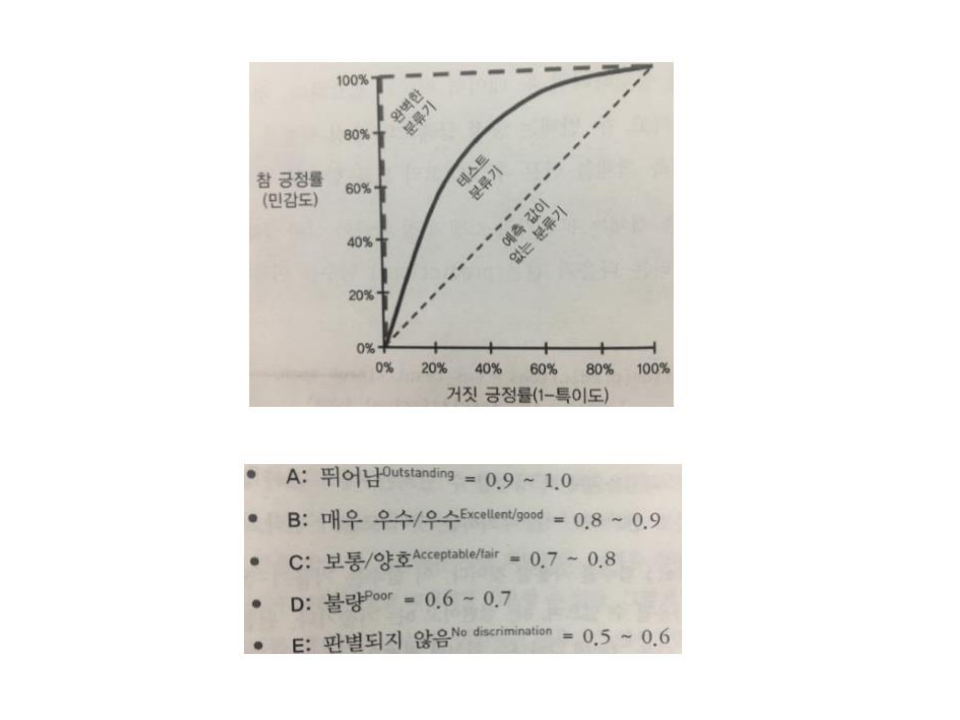

## ■ AUC란?

__" Area Under the roc Curve "__  
Roc커브 아래쪽 면적인데 면적이 넓을수록 좋은 분류기이다.  

A : 뛰어남 (0.9 ~ 1.0)  
B : 매우우수 (0.8 ~ 0.9)  
C : 보통/양호 (0.7 ~ 0.8)   
D : 불량 (0.6 ~ 0.7)   
E : 판별되지않음 (0.5 ~ 0.6)  

In [ ]:
from sklearn import metrics
result = sklearn.metircs.roc_auc_score(y_true,y_hat)
print(restult)

In [29]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

from sklearn import svm

model= svm.SVC(kernel='rbf',C=1 ,gamma=0.1)
model.fit(X_train,y_train)
y_hat=model.predict(X_test)

# =============================================================================
# # oob 평가
# 
# print(tree_model.oob_score_)
# print('\n')
# 
# =============================================================================




# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 

svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)

tn,fp,fn,tp = metrics.confusion_matrix(y_test, y_hat).ravel()

print(tn,fp,fn,tp)
print('\n')

sensitivity = tp / (tp+fn)
specificity = tn / (fp+tn)

print('민감도 : ', sensitivity)
print('특이도 : ', specificity)

# 모형 성능 평가 - 평가지표 계산 (정밀도, 재현도, f1-score 계산)
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

from sklearn.metrics import cohen_kappa_score

result = cohen_kappa_score(y_test, y_hat)
print('카파지수 : ', result)

auc_result = metrics.roc_auc_score(y_test,y_hat)
print('AUC : ', auc_result)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


[[120   5]
 [ 34  56]]
120 5 34 56


민감도 :  0.6222222222222222
특이도 :  0.96
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       125
           1       0.92      0.62      0.74        90

    accuracy                           0.82       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.84      0.82      0.81       215

카파지수 :  0.6097277170118687
AUC :  0.7911111111111111


|       모델       | 정확도 | 카파지수 | 민감도 | 특이도 | 정밀도 | 재현율 | AUC   |
|:----------------:|:------:|:--------:|:------:|:------:|:------:|:------:|-------|
| 서포트 벡터 머신 |  0.81  |   0.59   |  0.71  |  0.89  |  0.93  |  0.69  | 0.791 |
|   랜덤 포레스트  |  0.78  |   0.537  |  0.71  |  0.94  |  0.89  |  0.72  | 0.765 |

## ■ 16장. 앙상블 기법


앙상블 자료 링크 : https://www.slideshare.net/freepsw/boosting-bagging-vs-boosting

### ※ 앙상블이 무엇인가요?

여러 모델을 이용하여 데이터를 학습하고, 모든 모델의 예측결과를 평균하여 예측하는 것을 말합니다.

### ※ 앙상블은 왜 편차는 작은데 예측값의 분산은 큰가요 ?

각 모델별로 예측하는 값이 다르기 때문에, 분산이 크다.  
그래서 여러 모델들이 예측한 값의 평균을 이용해서 평균값을 사용하면 분산을 작게할수 있다.  
모델이 많을수록 그 분산값은 작아지고 실제 데이터와 유사해집니다.

### ■ 랜덤포레스트가 무엇인가요?

앙상블의 배깅(Bagging) + 의사결정트리를 겨합한 구조의 모델입니다.  
앙상블 트기 갯수가 많을수록 실제 데이터를 잘 분류하는 모델이 됩니다.

### ※ 학습한 모델의 예측 오류는 무엇인가요?

1. Bias(편차) : 예측값들이 정답과 얼마나 멀리 있는지에 대한 범위 
2. Variance(분산) : 학습된 모델별로 예측한 값들의 차이

둘다 작을수록 좋은것인데 앙상블의 경우에는 모델별로 예측값의   
차이가 있기 때문에 분산이 크게 나타나는 오류가 있다. 

그럼 __분산도 줄이고__ __바이어스도 줄일 수 있는 모델__은 무엇인가요?

__앙상블의 배깅과 부스팅__입니다.

### ※ 모델의 복잡도가 올라가면 어떻게 되나요 ?

바이어스는 줄어드나 분산(모델별로 예측한 값의 차이가)이 증가합니다.


### ※ 배깅과 부스팅의 차이에 대해서 설명해주세요~

1. 배깅은 variance를 감소시키는데 목적을 두고  
2. 부스팅은 bias를 감소시키는데 목적을 둡니다. 

__배깅__은 데이터를 단순히 샘플링해서 각 모델에 적용한다면,  
__부스팅__은 이전 모델들이 예측하지 못한 Error 데이터에 가중치를 부여하여 다음 모델이 더 잘 예측하도록 하는 것을 말한다.

### ※ 부스팅을 이용한 머신러닝 알고리즘은 무엇이 있습니까? (면접질문)

#### Adaboost 와 GBM, XGBoost, Ligth GBM ( 현업에서도 많이 쓴다.)

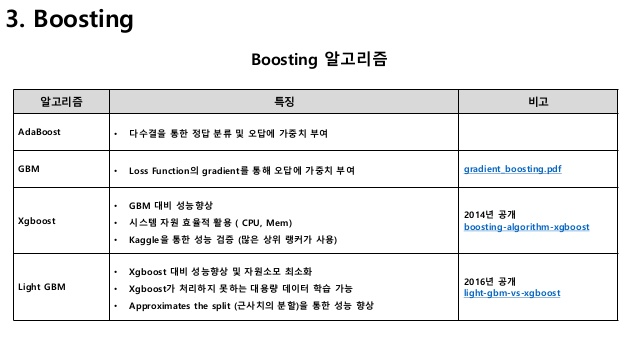

## ■ XGBoost의 원리가 무엇입니까?

__" 의사결정트리 + Boosting 기법 "__

1. 의사결정트리 => __회귀트리(cart) :__ 의사결정트리의 결과가 분류가 아니라 score 값

## 문제248. seaborn의 타이타닉 데이터를 XGboost 모델로 분류하시오!

- 서포트 벡터 머신 시본 타이타닉 분류 모델을 먼저 수행합니다.

In [ ]:
# 변경해야하는 코드

from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

y_hat = xgb_model.predict(X_test)
print(y_hat)

In [35]:
# -*- coding: utf-8 -*-

### 1. SVM을 썻을 경우
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

# 카파 지수 도출 (두 평가자의 일치도)
kappa_result = cohen_kappa_score(y_test, y_hat)
print('카파지수 = ' , kappa_result) # 좋은 일치
print('\n')

# AUC 도출
auc_result = metrics.roc_auc_score(y_test,y_hat)
print('AUC = ' ,auc_result)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215

카파지수 =  0.5990675990675991


AUC =  0.7855555555555556


C:\Users\wdp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
# -*- coding: utf-8 -*-

### 2. XGB Boost 사용하기.
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''
# 변경해야하는 코드

from xgboost import XGBClassifier


xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

y_hat = xgb_model.predict(X_test)

print(y_hat)
print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

# 카파 지수 도출 (두 평가자의 일치도)
kappa_result = cohen_kappa_score(y_test, y_hat)
print('카파지수 = ' , kappa_result) # 좋은 일치
print('\n')

# AUC 도출
auc_result = metrics.roc_auc_score(y_test,y_hat)
print('AUC = ' ,auc_result)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


[0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0]
[0 1 1 0 0 0 1 0 0 0]
[0 1 1 0 0 0 1 0 0 0]


[[111  11]
 [ 26  67]]


              precision    recall  f1-score   support

           0       0.81      0.91      0.86       122
           1       0.86      0.72      0.78        93

    accuracy                           0.83       215
   macro avg       0.83      0.82      0.82       215
weighted avg       0.83      0.83      0.83       215

카파지수 =  0.6425843554836681


AUC =  0.8151330865503261


## 문제249. lightGBM으로 seaborn의 타이타닉 데이터의 정확도와 카파지수를 확인하시오!

In [44]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [49]:
# -*- coding: utf-8 -*-

### 2. XGB Boost 사용하기.
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''
# 변경해야하는 코드

from lightgbm import LGBMClassifier

lgb_model= LGBMClassifier(boosting_type='gbdt',random_state =94,colsample_bytree=0.9,max_depth=20,subsample=0.9,n_estimators=600) 
lgb_model.fit(X_train, y_train)   

# 7단계 테스트 데이터로 예측을 한다.
y_hat = lgb_model.predict( X_test )


 
print(y_hat)
print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

# 카파 지수 도출 (두 평가자의 일치도)
kappa_result = cohen_kappa_score(y_test, y_hat)
print('카파지수 = ' , kappa_result) # 좋은 일치
print('\n')

# AUC 도출
auc_result = metrics.roc_auc_score(y_test,y_hat)
print('AUC = ' ,auc_result)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


[0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0
 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0]
[0 1 1 0 1 0 1 0 0 0]
[0 1 1 0 0 0 1 0 0 0]


[[105  17]
 [ 24  69]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       122
           1       0.80      0.74      0.77        93

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215

카파지수 =  0.6080305927342256


AUC =  0.8012956107879429
